In [2]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00


In [3]:
!apt-get update
!apt-get install chromium chromium-driver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,586 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,191 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,154 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,348 kB]
Get:14 http://archiv

In [4]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [30]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [31]:
driver = web_driver()

In [7]:
# driver = webdriver.Chrome(options=options)
# driver.maximize_window()

In [32]:
url = driver.get("https://www.skinnytaste.com/recipe-index/")
time.sleep(2)

In [11]:
# items = driver.find_elements(By.CSS_SELECTOR, 'div.ast-row > article div.post-thumb-img-content.post-thumb > a')
# print(len(items))

# All recipe Link collection


In [8]:
links = []

In [9]:
i=2
while i<52 :
    print("page: ",i-1)
    items = driver.find_elements(By.CSS_SELECTOR, 'div.ast-row > article div.post-thumb-img-content.post-thumb > a')
    for item in items:
        link = item.get_attribute("href")
        links.append(link)
          #try:
          #next_page = driver.find_element(By.CSS_SELECTOR,"div > a.facetwp-page.next").click()
    url2 = f"?_paged={i}"
    url3 = "https://www.skinnytaste.com/recipe-index/"+url2
    next_page = driver.get(url3)
    time.sleep(2)
    i=i+1
#     if next_page=="end":
#         break

page:  1
page:  2


KeyboardInterrupt: 

In [10]:
# print(len(links))

In [11]:
# df = pd.DataFrame({"url":links})
# df.to_csv("D:\\Skinnytaste\\recipe urls.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/Abo Akademi data science'

'recipe urls.csv'   skinnytaste_recipe_info.csv


In [3]:
import os
os.chdir("/content/drive/MyDrive/Abo Akademi data science")

In [15]:
df=pd.read_csv("recipe urls.csv")
df

,url
0,https://www.skinnytaste.com/crustless-pumpkin-...
1,https://www.skinnytaste.com/red-curry-salmon/
2,https://www.skinnytaste.com/free-7-day-healthy...
3,https://www.skinnytaste.com/apple-butter-recipe/
4,https://www.skinnytaste.com/roasted-delicata-s...
...,...
995,https://www.skinnytaste.com/cream-of-broccoli-...
996,https://www.skinnytaste.com/cilantro-lime-tila...
997,https://www.skinnytaste.com/kale-and-potato-so...
998,https://www.skinnytaste.com/banana-foster-crepes/


# Collecting the filtered data

In [33]:
temp=[]

In [24]:
# driver = webdriver.Chrome(options=options)
# driver.maximize_window()

In [34]:
count = 0
for url in df["url"][0:]:
    print(count)
    driver.get(url)
    time.sleep(3)
    try:
        title = driver.find_element(By.CSS_SELECTOR, "div > h1").text
    except:
        title = "N/A"
#     print(title)
    try:
        recipe_key = driver.find_element(By.CSS_SELECTOR,"div > div.post-meta-info.ast-flex > div > ul").text
    except:
        recipe_key = "N/A"
#     print(recipe_key)
    try:
        cal = driver.find_element(By.CSS_SELECTOR,"span.recipe-meta-value.value-calories").text
    except:
        cal = "N/A"
#     print(cal)
    try:
        points = driver.find_element(By.CSS_SELECTOR,"span.recipe-meta-value.recipe-ww-pp.icon").text
    except:
        points = "N/A"
#     print(points)
    try:
        img = driver.find_elements(By.CSS_SELECTOR," div.entry-content.clear  div  img")
        co = 1
        for im in img:
            jpg = im.get_attribute("src")
            ti = title.split()
            if (len(ti)<5):
                if ti[0] in jpg:
                    img=jpg
                    break
            else:
                ti = ti[0]+"-"+ti[1]+"-"+ti[2]
                if ti in jpg:
                    img=jpg
                    break
                elif co==len(img):
                    img = img[0].get_attribute("src")
                    break

                else:
                    new=0
            co+=1
    except:
        img = "N/A"
    #print(img)
    try:
        summar = driver.find_elements(By.CSS_SELECTOR,"div.entry-content.clear > p")
        summ = summar[0].text
    except:
        summ = "N/A"
    #print(summ)
    dictionary = {
        "Name of the food":title,
        "The recipe Key":recipe_key,
        "Calories":cal,
        "Personal Points":points,
        "Image of the food":img,
        "Summary":summ
    }
    temp.append(dictionary)
    count+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [35]:
df2 = pd.DataFrame(temp)
df2

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,DF\nGF\nHF\nV,Cals: 124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,DF\nGF\nHP,Cals: 349,6,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),N/A,N/A,N/A,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,DF\nGF\nKF\nV,Cals: 34,1,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,DF\nGF\nV,Cals: 177,4,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,GF\nKF\nLC\nQ\nV,Cals: 150,4,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,GF\nHF\nKF\nQ,Cals: 310,5,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,DF\nFM\nGF\nHF\nKF\nMP\nW,Cals: 232,5,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,DF\nGF\nKF\nV,Cals: 185,6,N/A,Banana Foster Crepes combine two of my favorit...


In [36]:
df2["The recipe Key"] = df2["The recipe Key"].str.replace('\n',',')
df2

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",Cals: 124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",Cals: 349,6,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),N/A,N/A,N/A,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,"DF,GF,KF,V",Cals: 34,1,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",Cals: 177,4,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",Cals: 150,4,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",Cals: 310,5,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",Cals: 232,5,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",Cals: 185,6,N/A,Banana Foster Crepes combine two of my favorit...


In [37]:
df = df2.drop(df2[df2['Name of the food'] == 'N/A'].index)
df

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",Cals: 124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",Cals: 349,6,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),N/A,N/A,N/A,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,"DF,GF,KF,V",Cals: 34,1,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",Cals: 177,4,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",Cals: 150,4,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",Cals: 310,5,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",Cals: 232,5,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",Cals: 185,6,N/A,Banana Foster Crepes combine two of my favorit...


In [41]:
df =df.drop_duplicates()
df

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",Cals: 124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",Cals: 349,6,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),N/A,N/A,N/A,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,"DF,GF,KF,V",Cals: 34,1,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",Cals: 177,4,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",Cals: 150,4,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",Cals: 310,5,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",Cals: 232,5,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",Cals: 185,6,N/A,Banana Foster Crepes combine two of my favorit...


In [47]:
df["Calories"] = df["Calories"].str.replace('Cals:','')
df

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",124.5,2,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",349,6,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),N/A,N/A,N/A,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,"DF,GF,KF,V",34,1,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",177,4,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",150,4,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",310,5,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",232,5,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",185,6,N/A,Banana Foster Crepes combine two of my favorit...


In [48]:
df.to_csv("skinnytaste_recipe_info.csv",index=False)

In [5]:
import pandas as pd
df=pd.read_csv("skinnytaste_recipe_info.csv")
df

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",124.5,2.0,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",349.0,6.0,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
2,Free 7 Day Healthy Meal Plan (Sept 23-29),NaN,NaN,NaN,https://www.skinnytaste.com/wp-content/uploads...,"A free 7-day, flexible weight loss meal plan i..."
3,Apple Butter,"DF,GF,KF,V",34.0,1.0,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",177.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",150.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",310.0,5.0,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",232.0,5.0,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",185.0,6.0,NaN,Banana Foster Crepes combine two of my favorit...


In [41]:
df3 = df.dropna(subset=["The recipe Key", "Calories", "Personal Points"], inplace=True)


In [50]:
df

,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",124.5,2.0,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",349.0,6.0,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
3,Apple Butter,"DF,GF,KF,V",34.0,1.0,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",177.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
5,Apple Bread,V,124.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,Moist cinnamon apple bread recipe made with ap...
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",150.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",310.0,5.0,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",232.0,5.0,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",185.0,6.0,NaN,Banana Foster Crepes combine two of my favorit...


# Visualization

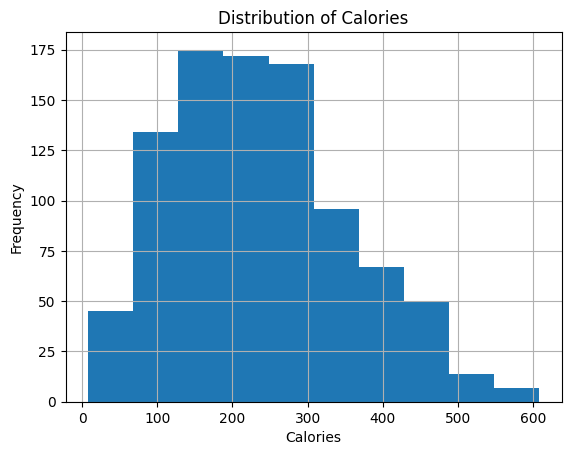

In [77]:
import matplotlib.pyplot as plt
# draw a histogram of the calories column
df['Calories'].hist(bins=10)

# add labels and title
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.savefig('caloris distribution.pdf')

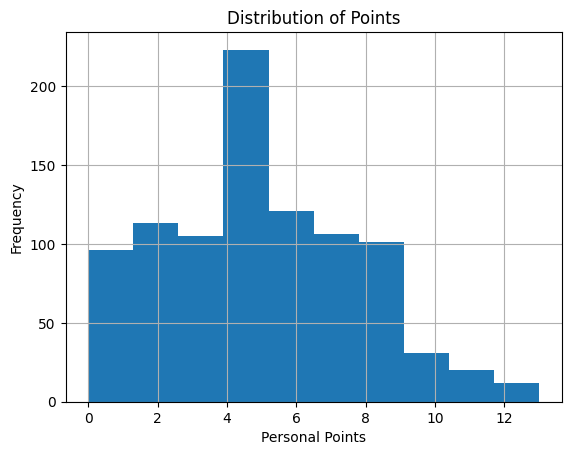

In [78]:
# draw a histogram of the personal points column
df['Personal Points'].hist(bins=10)

# add labels and title
plt.xlabel('Personal Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.savefig('points distributions.pdf')

In [51]:
df2 = df["The recipe Key"]
df2

,The recipe Key
0,"DF,GF,HF,V"
1,"DF,GF,HP"
3,"DF,GF,KF,V"
4,"DF,GF,V"
5,V
...,...
995,"GF,KF,LC,Q,V"
996,"GF,HF,KF,Q"
997,"DF,FM,GF,HF,KF,MP,W"
998,"DF,GF,KF,V"


In [52]:
lis = []
for i in df2:
      # print(type(i))
      i=i.split(',')
      # print(i)
      # print(type(i))
      dic = {
          "The recipe key":i
      }
      lis.append(dic)

In [53]:
df3 = pd.DataFrame(lis)
df3

,The recipe key
0,"[DF, GF, HF, V]"
1,"[DF, GF, HP]"
2,"[DF, GF, KF, V]"
3,"[DF, GF, V]"
4,[V]
...,...
923,"[GF, KF, LC, Q, V]"
924,"[GF, HF, KF, Q]"
925,"[DF, FM, GF, HF, KF, MP, W]"
926,"[DF, GF, KF, V]"


In [58]:
df4 = df3.explode('The recipe key')
df4

,The recipe key
0,DF
0,GF
0,HF
0,V
1,DF
...,...
927,FM
927,GF
927,HF
927,KF


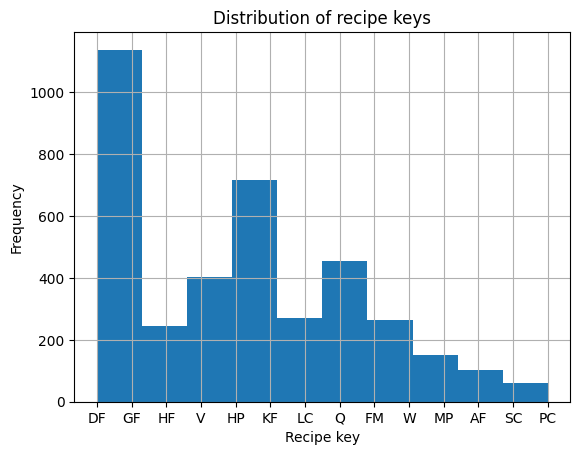

In [80]:
# draw a histogram of the recipe key column
df4['The recipe key'].hist(bins=10)

# add labels and title
plt.xlabel('Recipe key')
plt.ylabel('Frequency')
plt.title('Distribution of recipe keys')

# plt.legend(['DF=Dairy Free Recipes','GF=Gluten Free','HF=High-Fiber Recipes','V=Vegetarian Meals','HP=High Protein Recipes', 'KF=Kid Friendly','LC=Low Carb','Q=Under 30 Minutes','FM=Freezer Meals','W=Whole30 Recipes','MP=Meal Prep Recipes','AF=Air Fryer Reipes','SC=Slow Cooker Recipes','PC=Pressure Cooker Recipes'])
# plt.legend(bbox_to_anchor=(5, 1), loc='center right')
plt.savefig('recipe keys distribution.pdf')

In [81]:
df


,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
0,Crustless Pumpkin Pie,"DF,GF,HF,V",124.5,2.0,https://www.skinnytaste.com/wp-content/uploads...,"Skip the crust and make this easy gluten-free,..."
1,Red Curry Salmon,"DF,GF,HP",349.0,6.0,https://www.skinnytaste.com/wp-content/uploads...,Thai-inspired Red Curry Salmon is simmered in ...
3,Apple Butter,"DF,GF,KF,V",34.0,1.0,https://www.skinnytaste.com/wp-content/uploads...,This easy apple butter recipe simmers on the s...
4,Roasted Delicata Squash,"DF,GF,V",177.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,"Roasted Delicata Squash with toasted almonds, ..."
5,Apple Bread,V,124.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,Moist cinnamon apple bread recipe made with ap...
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,"GF,KF,LC,Q,V",150.0,4.0,https://www.skinnytaste.com/wp-content/uploads...,Cream of Broccoli Soup is a favorite of comfor...
996,Cilantro-Lime Fish Tacos,"GF,HF,KF,Q",310.0,5.0,[<selenium.webdriver.remote.webelement.WebElem...,These easy Cilantro Lime Fish Tacos are made w...
997,Kale and Potato Soup with Turkey Sausage,"DF,FM,GF,HF,KF,MP,W",232.0,5.0,https://www.skinnytaste.com/wp-content/uploads...,Kale and Potato Soup with Turkey Sausage is an...
998,Banana Foster Crepes,"DF,GF,KF,V",185.0,6.0,NaN,Banana Foster Crepes combine two of my favorit...


# User interaction


In [102]:
cal1 = float(input("calorie range: "))
print(cal1)
point = float(input('Points range: '))
output = df[(df["Calories"]<cal2) & (df["Personal Points"]<point)]
sorted_df = output.sort_values(by=['Calories'], ascending=False)
sorted_df.head(10)

calorie range: 50
50.0
Points range: 3


,Name of the food,The recipe Key,Calories,Personal Points,Image of the food,Summary
967,Air Fryer Hard Boiled Eggs,"AF,DF,GF,KF,LC,Q,V,W",78.0,0.0,https://www.skinnytaste.com/wp-content/uploads...,Making hard boiled eggs in the air fryer is so...
983,Hard Boiled Eggs,"DF,GF,KF,LC,Q,W",77.0,0.0,[<selenium.webdriver.remote.webelement.WebElem...,"If you want to know how to hard boil eggs, thi..."
283,How To Grill Corn on The Cob,"DF,GF,KF,V",77.0,0.0,NaN,"Grilled corn on the cob is an easy, classic su..."
517,Blueberry Frozen Yogurt,"GF,KF,V",76.0,2.0,https://www.skinnytaste.com/wp-content/uploads...,"Blueberry Frozen Yogurt, made with only five i..."
253,Waffled Zucchini Fritters,"DF,GF,KF,LC,V",75.0,2.0,NaN,Dust off that waffle iron and make these savor...
474,Raspberry Coconut Chia Pudding Popsicles,"DF,FM,GF,LC,V",74.0,2.0,https://www.skinnytaste.com/wp-content/uploads...,These easy chia pudding popsicles with coconut...
298,Artichoke Dip,"GF,KF,LC,Q,V",73.7,2.0,https://www.skinnytaste.com/wp-content/uploads...,"This creamy, delicious artichoke dip is hot an..."
259,Coleslaw Recipe,"DF,GF,LC,Q,V,W",73.0,2.0,NaN,This easy coleslaw recipe is the perfect side ...
732,Sauteed Collard Greens with Bacon,"DF,GF,LC,Q",73.0,2.0,https://www.skinnytaste.com/wp-content/uploads...,Thinly sliced collard greens sautéed with baco...
55,Grape Tomato Sauce,"DF,GF,KF,LC,Q,V",73.0,1.0,[<selenium.webdriver.remote.webelement.WebElem...,When grape tomatoes are overflowing in your ga...
